# <p style="background-color:steelblue;font-family:newtimeroman;font-size:140%;color:white;text-align:center;border-radius:20px 20px;"><b> Credit Score Classification - Data Cleaning for test data

In [1]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/DSS/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/DSS/data\test.csv
/DSS/data\test_cleaned.csv
/DSS/data\test_trans.csv
/DSS/data\train.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import numpy as np

# Data Cleaning

In [4]:
df = pd.read_csv("/DSS/data/test.csv")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,...,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [48]:
# Kiểm tra trùng lặp
def ktra_trung(df):
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("Có", num_duplicates, "trùng lặp trong tập dữ liệu.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "Đã xóa dữ liệu trùng!")
        print("Không còn hàng trùng lặp!")
    else:
        print("Không có trùng lặp nào trong tập dữ liệu.")

ktra_trung(df)


Không có trùng lặp trong tập dữ liệu.


In [49]:

df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [50]:
df = df.replace("_", "", regex=True)

In [51]:
df[df.eq('').any(axis=1)]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
4,28,,34847.84,2,4,6,1,3,1,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923
6,28,Teacher,34847.84,2,4,6,1,3,NaN,5.000,,605.03,30.996,27 Years and 5 Months,No,18.816,72.68014533363515,HighspentLargevaluepayments,452.30230675990265
7,28,Teacher,34847.84,2,4,6,1,3,2,5.000,,605.03,33.875,27 Years and 6 Months,No,18.816,153.53448761392985,!@9#%8,421.44796447960783
13,55,Entrepreneur,30689.89,2,5,4,-100,5,8,4.000,,632.46,36.280,18 Years and 0 Months,No,16.415,29.393311428984493,HighspentLargevaluepayments,455.440320244524
16,22,Developer,35547.71,7,5,5,0,5,15,4.000,,943.86,34.730,31 Years and 4 Months,Yes,0.000,59.36605764456292,HighspentMediumvaluepayments,475.96485902210367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,45,MediaManager,16680.35,1,1,5,4,1,0,8.000,,897.16,25.793,22 Years and 0 Months,NM,41.114,40.89305193681736,LowspentLargevaluepayments,340.79630413992334
49991,50,Writer,37188.1,1,4,5,3,3,12,3.000,,620.64,36.498,30 Years and 8 Months,No,33013.000,238.3993828976901,LowspentLargevaluepayments,257.095501010799
49994,29,,20002.88,10,8,29,5,33,22,12.000,Bad,3571.7,27.028,6 Years and 6 Months,Yes,60.965,50.84684680498023,HighspentSmallvaluepayments,341.179047488264
49995,4975,Architect,20002.88,10,8,29,5,33,25,12.000,,3571.7,34.781,NaN,Yes,60.965,146.48632477751087,LowspentSmallvaluepayments,275.53956951573343


In [52]:
df = df.replace("_", "", regex=True)
# Lọc các hàng trong dataframe chứa giá trị rỗng
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Điền giá trị np.nan vào các ô trống trong các hàng đã chọn
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [53]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,4,3,4,3,7,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772
1,24,Scientist,19114.12,3,4,3,4,3,9,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196
2,24,Scientist,19114.12,3,4,3,4,-1,4,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,LowspentMediumvaluepayments,264.67544623342997
3,24,Scientist,19114.12,3,4,3,4,4,5,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,HighspentMediumvaluepayments,343.82687322383634
4,28,NaN,34847.84,2,4,6,1,3,1,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923


In [54]:
df.shape

(50000, 19)

In [55]:
df.isna().sum()

Age                            0
Occupation                  3438
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,50000.000,16.838,116.397,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,50000.000,22.921,129.315,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,50000.000,68.773,451.602,1.000,8.000,13.000,20.000,5799.000
Delay_from_due_date,50000.000,21.053,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,48965.000,30.080,196.984,0.000,4.000,7.000,10.000,2593.000
Credit_Utilization_Ratio,50000.000,32.280,5.106,20.510,28.061,32.280,36.469,48.541
Total_EMI_per_month,50000.000,1491.304,8595.648,0.000,32.222,74.733,176.157,82398.000


In [57]:
df.describe(include='object').T

,count,unique,top,freq
Age,50000,928,39,1570
Occupation,46562,15,Lawyer,3324
Annual_Income,50000,12989,17273.83,8
Num_of_Loan,50000,252,2,7515
Num_of_Delayed_Payment,46502,411,19,2707
Credit_Mix,40195,3,Standard,18379
Outstanding_Debt,50000,12203,1109.03,12
Credit_History_Age,45530,399,20 Years and 1 Months,254
Payment_of_Min_Amount,50000,3,Yes,26158
Amount_invested_monthly,47729,45450,10000,2175


## Tìm và thay đổi các giá trị sai hoặc thiếu 

### Age

In [58]:
df.Age.nunique()

928

In [59]:
df.Age.value_counts(ascending=False).head(10)

Age
39    1570
32    1529
44    1500
22    1493
35    1483
37    1461
27    1457
29    1441
20    1432
26    1421
Name: count, dtype: int64

In [60]:
import re

def non_numeric_values(df, column_name):
    # Định nghĩa một biểu thức chính quy để khớp với các ký tự không phải số
    pattern = r'\D+'
    
    # Tìm các giá trị không phải số sử dụng biểu thức chính quy
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Làm phẳng danh sách các danh sách con
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Sử dụng tập hợp (set) để đảm bảo tính duy nhất
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

# Gọi hàm và in các giá trị không phải số duy nhất trong cột 'Age'
unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)


{'-'}


In [61]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()
df[df['Age'] > 100]['Age'].unique()

array([1694,  914, 3193,  339, 1203, 2823, 1643, 8327, 6586, 7014, 3391,
       3765, 4472, 4022, 4576, 3355, 8034, 4610, 7860, 2526, 3263, 4885,
        694, 8288, 8404,  451, 3168, 5172, 8214, 4946, 3127, 7018, 2950,
       7676, 5502, 4133, 2083, 3752, 2970, 7721, 4806, 5426, 4787, 4390,
       3218, 6000,  538, 7319, 5530, 6838, 2069, 8337, 2532, 1587, 7749,
       5255, 5532, 7045, 1950, 5333, 2077, 1844, 2954, 4329, 1919, 8449,
       7237, 5061, 2695, 3287, 7507, 4556, 5092, 6978, 8497, 3712,  693,
       3922, 6097, 3527, 7836, 5165, 7849,  327, 6317, 3930, 2193, 7222,
        505, 7261, 6205,  942, 7260, 2002, 3984, 6678, 4763, 4954, 5720,
       6965, 3482, 6099, 5029, 1804, 7470,  676, 5733, 7005, 1631, 4204,
        835, 2585,  492, 1193, 3759, 2485, 4305, 2902, 2082, 6798, 5488,
       5546, 8001, 8641, 6439, 8481, 6558, 6866, 2049, 3981, 6659,  171,
       7461, 5410, 2383, 4873, 2231, 4741, 5205, 6248, 6966, 3485,  536,
       5760, 5104, 3876, 5621, 2104, 5549, 2404, 49

In [62]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

### Xử lý cột nghề nghiệp


In [63]:
df.Occupation.value_counts()

Occupation
Lawyer          3245
Engineer        3118
Architect       3104
Mechanic        3089
MediaManager    3050
Developer       3042
Accountant      3042
Scientist       3017
Teacher         3009
Entrepreneur    3007
Journalist      2957
Doctor          2955
Manager         2906
Musician        2860
Writer          2852
Name: count, dtype: int64

In [64]:
df.Occupation.isna().sum()

3346

In [65]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

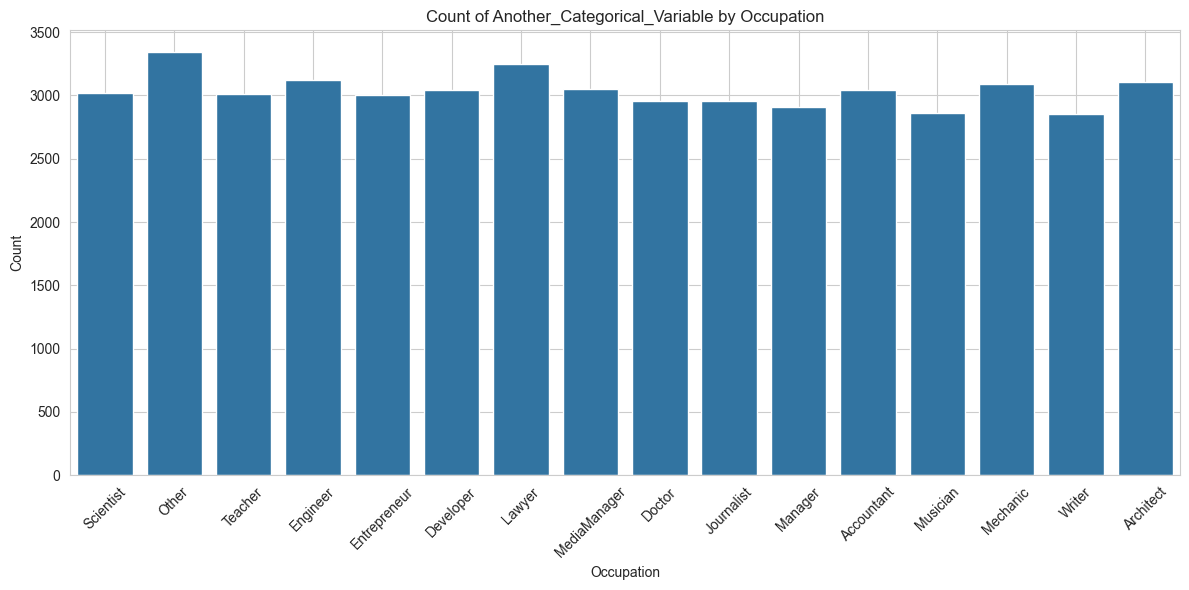

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Num_Bank_Accounts

In [67]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [68]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

16

In [70]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)


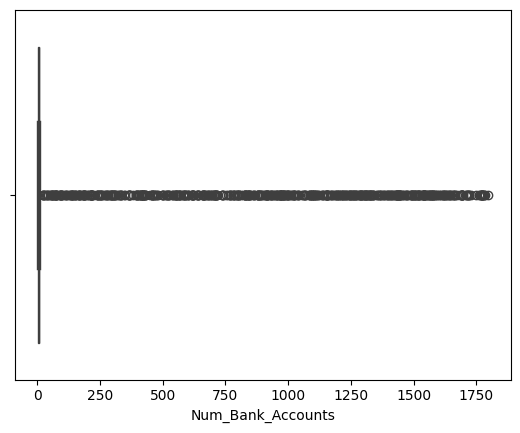

In [ ]:
sns.boxplot(data= df, x = df.Num_Bank_Accounts);

### Num_of_Loan

In [ ]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100], dtype=int64)

In [ ]:
df['Num_of_Loan'].unique()

In [ ]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative, dropping them

1920

In [ ]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.shape

(46657, 19)

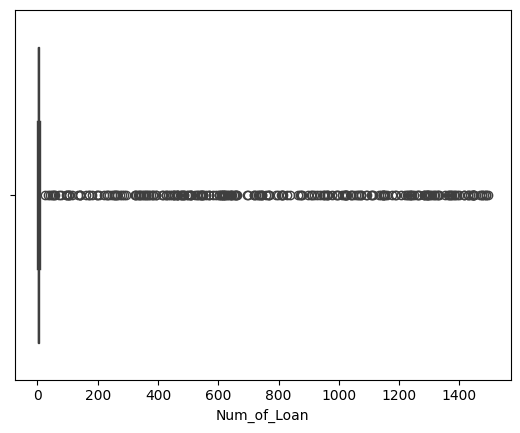

In [ ]:
sns.boxplot(data= df, x = df.Num_of_Loan);

### Delay_from_due_date

In [ ]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [ ]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -4, -3, -5], dtype=int64)

In [ ]:
df['Num_of_Loan'].nunique()

244

In [ ]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

275

In [ ]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(46382, 19)

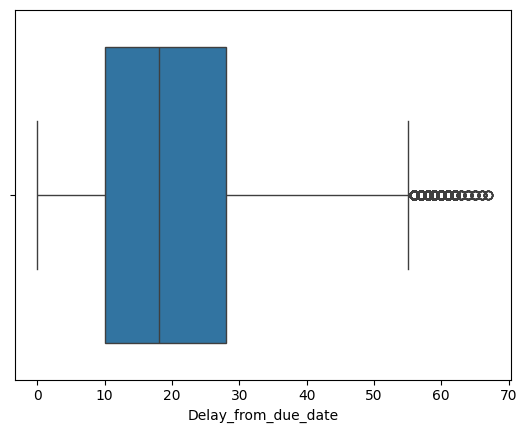

In [ ]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

### Num_of_Delayed_Payment

In [ ]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'.', 'nan'}

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-2., -1., -3.])

In [ ]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

262

In [ ]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(46120, 19)

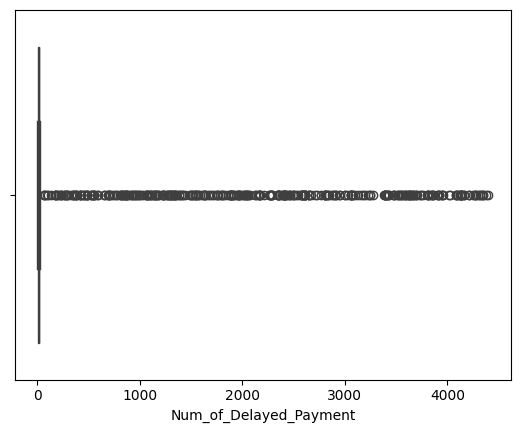

In [ ]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'].dropna());

In [ ]:
df['Num_of_Delayed_Payment'].value_counts().head(10)

Num_of_Delayed_Payment
19.0    2541
15.0    2512
16.0    2466
18.0    2462
17.0    2423
10.0    2410
12.0    2374
20.0    2368
11.0    2304
8.0     2240
Name: count, dtype: int64

In [72]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):

    # Trích xuất cột cần được điền giá trị
    column_to_impute = df[[column_name]]

    # Tạo một phiên bản của lớp KNNImputer
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit và transform để điền các giá trị thiếu trong cột
    column_imputed = imputer.fit_transform(column_to_impute)

    # Thay thế cột gốc bằng các giá trị đã được điền
    df[column_name] = column_imputed
    return df


In [73]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

# to specify the number of neighbors:
# df = knn_impute_column(df, 'Num_of_Delayed_Payment', n_neighbors=10)

In [74]:
df['Num_of_Delayed_Payment'].isna().sum()

0

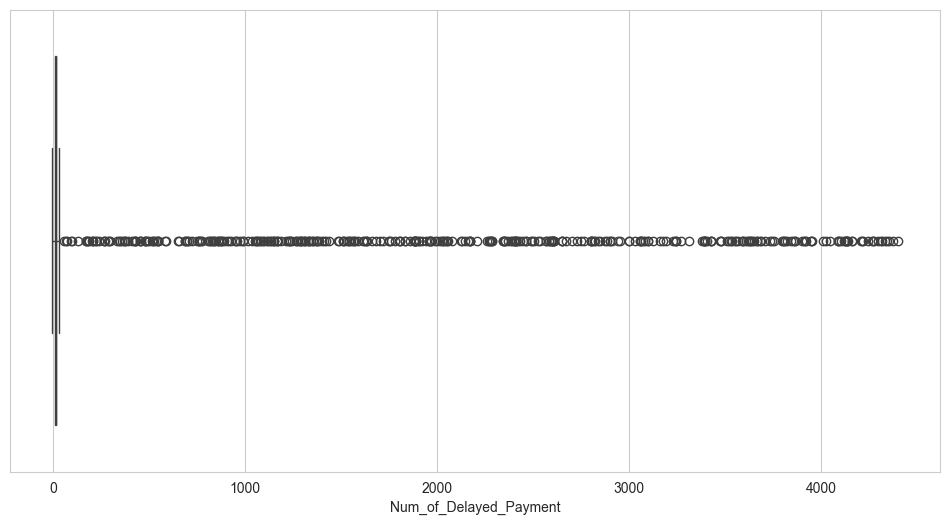

In [75]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);

### Num_Credit_Inquiries

In [76]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [77]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

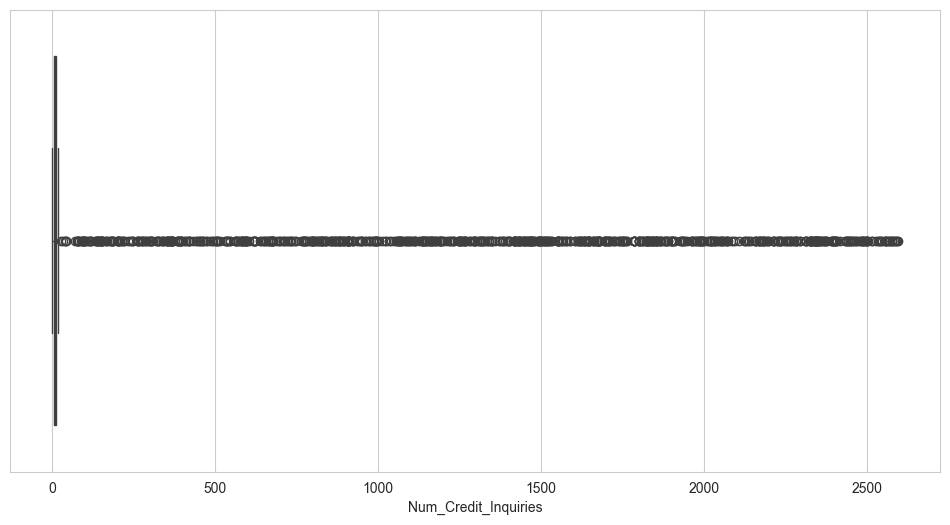

In [78]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries'].dropna());

In [79]:
df['Num_Credit_Inquiries'].isna().sum()

1011

In [80]:
df['Num_Credit_Inquiries'].nunique()

732

In [81]:
df['Num_Credit_Inquiries'].value_counts().head(10)

Num_Credit_Inquiries
5.000     4580
4.000     4287
6.000     4279
7.000     4181
8.000     3805
9.000     3415
3.000     3356
11.000    2910
10.000    2888
12.000    2518
Name: count, dtype: int64

In [82]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isna().sum()

0

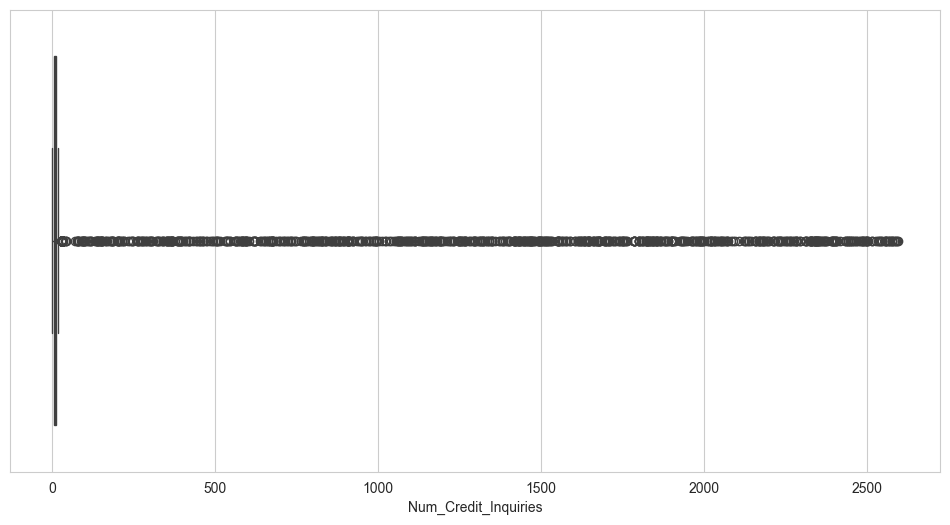

In [83]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);

### Credit_Mix

In [84]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    17844
Good        11946
Bad          9279
Name: count, dtype: int64

In [85]:
df.Credit_Mix.isna().sum()

9514

In [86]:
df['Credit_Mix'].fillna('Unknown', inplace=True)

df['Credit_Mix'].astype('object')

0           Good
1           Good
2           Good
3           Good
4           Good
          ...   
49994        Bad
49996       Good
49997       Good
49998       Good
49999    Unknown
Name: Credit_Mix, Length: 48583, dtype: object

In [87]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    17844
Good        11946
Unknown      9514
Bad          9279
Name: count, dtype: int64

### Credit_History_Age

In [88]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
16 Years and 1 Months     247
18 Years and 7 Months     246
20 Years and 1 Months     246
19 Years and 7 Months     245
16 Years and 6 Months     243
                         ... 
4 Years and 5 Months       20
0 Years and 11 Months      15
33 Years and 11 Months     14
34 Years and 0 Months      14
0 Years and 10 Months      11
Name: count, Length: 399, dtype: int64

In [89]:
df['Credit_History_Age'].isna().sum()

4358

In [90]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [91]:
df['Credit_History_Age'].isna().sum()

0

In [ ]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 1 Months     1811
30 Years and 6 Months     1186
19 Years and 7 Months     1113
14 Years and 0 Months     1030
16 Years and 1 Months      247
                          ... 
4 Years and 5 Months        20
0 Years and 11 Months       15
33 Years and 11 Months      14
34 Years and 0 Months       14
0 Years and 10 Months       11
Name: count, Length: 399, dtype: int64

In [92]:
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)
df.drop(columns=['Credit_History_Age'], inplace=True)

In [93]:
# Chuyển đổi số năm thành số tháng và cộng với số tháng để tính tổng số tháng
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Loại bỏ các cột 'Credit_History_Years' và 'Credit_History_Months'
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000,2022.000,Good,809.98,35.030,No,49.575,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772,273
1,24,Scientist,19114.12,3,4,3,4,3,9.000,4.000,Good,809.98,33.053,No,49.575,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196,274
2,24,Scientist,19114.12,3,4,3,4,-1,4.000,4.000,Good,809.98,33.812,No,49.575,148.23393788500925,LowspentMediumvaluepayments,264.67544623342997,366
3,24,Scientist,19114.12,3,4,3,4,4,5.000,4.000,Good,809.98,32.431,No,49.575,39.08251089460281,HighspentMediumvaluepayments,343.82687322383634,276
4,28,Other,34847.84,2,4,6,1,3,1.000,5.000,Good,605.03,25.927,No,18.816,39.684018417945296,HighspentLargevaluepayments,485.2984336755923,327


### Payment_of_Min_Amount

In [94]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    25375
No     17371
NM      5837
Name: count, dtype: int64

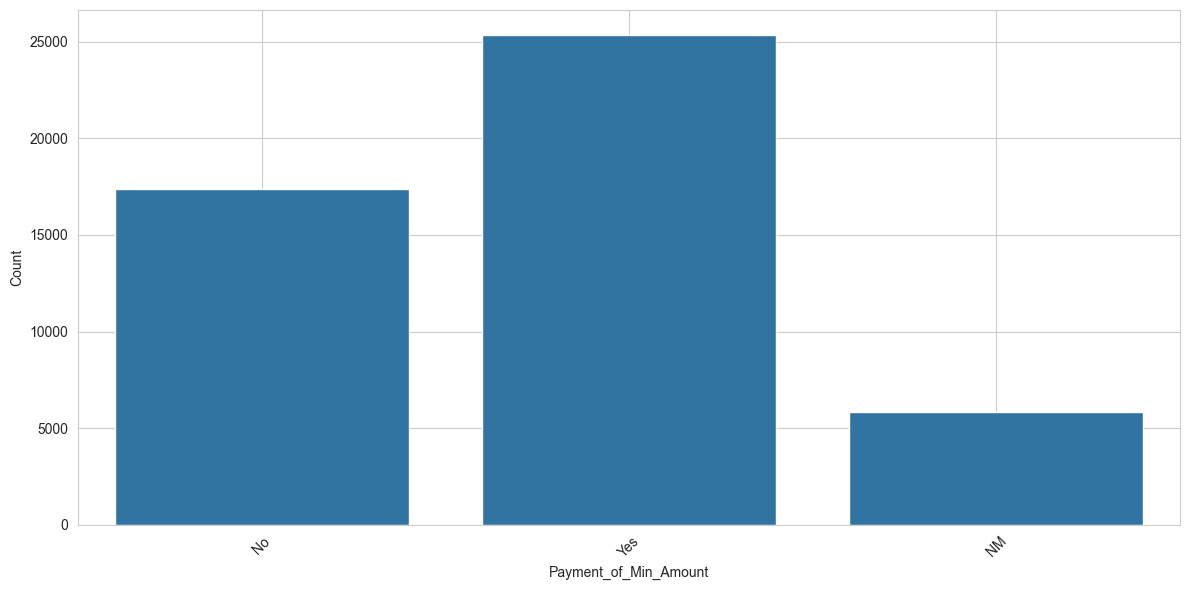

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Amount_invested_monthly

In [96]:
df.Amount_invested_monthly.nunique()

44163

In [97]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [98]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [99]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000    2110
0.000         103
236.643         1
857.881         1
191.859         1
279.176         1
169.492         1
67.401          1
76.336          1
26.828          1
812.818         1
128.779         1
245.267         1
86.642          1
80.673          1
Name: count, dtype: int64

In [100]:
df[df.Amount_invested_monthly.isna()].sample(15)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
25815,32,Scientist,41729.08,6,10,24,5,46,19.000,7.000,Bad,2617.44,38.847,Yes,155.958,NaN,LowspentMediumvaluepayments,217.94613046856492,172
37082,34,Developer,10732.78,6,6,15,2,16,13.000,7.000,Standard,915.78,25.880,Yes,11.438,NaN,LowspentSmallvaluepayments,277.4936478840445,199
14264,39,Architect,30813.68,3,3,8,4,7,10.000,2.000,Unknown,1312.2,32.283,No,236.657,NaN,HighspentMediumvaluepayments,330.0333074980151,227
32512,38,Architect,17756.42,7,3,32,5,30,11.000,8.000,Standard,2688.58,39.139,Yes,71.827,NaN,LowspentLargevaluepayments,296.2826452285858,192
8878,23,Developer,16472.87,7,5,32,9,20,17.000,12.000,Bad,2140.96,36.322,NM,66.724,NaN,HighspentSmallvaluepayments,270.47106249128797,168
22397,26,Mechanic,59112.81,5,7,8,3,15,6.000,8.000,Standard,1421.95,27.204,Yes,112.192,NaN,HighspentLargevaluepayments,538.9779003261201,274
43564,50,Musician,59555.68,3,5,6,2,10,8.000,2.000,Standard,1384.55,34.876,Yes,75.002,NaN,HighspentMediumvaluepayments,588.6351768404536,369
7698,34,Engineer,19455.49,7,3,20,2,15,30.809,9.000,Unknown,1427.03,36.158,Yes,31.307,NaN,LowspentSmallvaluepayments,304.7751649647411,156
2696,25,Musician,68171.54999999999,6,3,4,1,28,30.809,2.000,Standard,1049.75,33.064,No,49.234,NaN,HighspentSmallvaluepayments,455.99429163275045,265
26597,23,Doctor,59240.0,6,5,9,2,19,14.000,2.000,Standard,469.89,32.877,Yes,69.266,NaN,HighspentMediumvaluepayments,462.9015075454034,215


In [101]:
df = knn_impute_column(df, 'Amount_invested_monthly')
df.Amount_invested_monthly.isna().sum()

0

In [103]:
df.Amount_invested_monthly.value_counts().head(10)

Amount_invested_monthly
641.101      2209
10000.000    2110
0.000         103
236.643         1
279.176         1
169.492         1
67.401          1
76.336          1
26.828          1
812.818         1
Name: count, dtype: int64

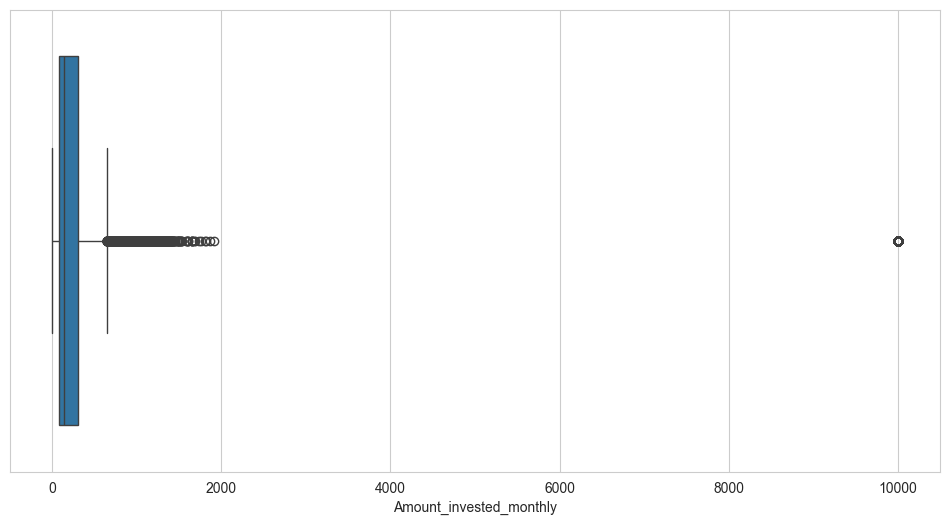

In [104]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);

In [105]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

2110

### Payment_Behaviour

In [106]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      12305
HighspentMediumvaluepayments     8654
LowspentMediumvaluepayments      6651
HighspentLargevaluepayments      6648
HighspentSmallvaluepayments      5510
LowspentLargevaluepayments       5117
!@9#%8                           3698
Name: count, dtype: int64

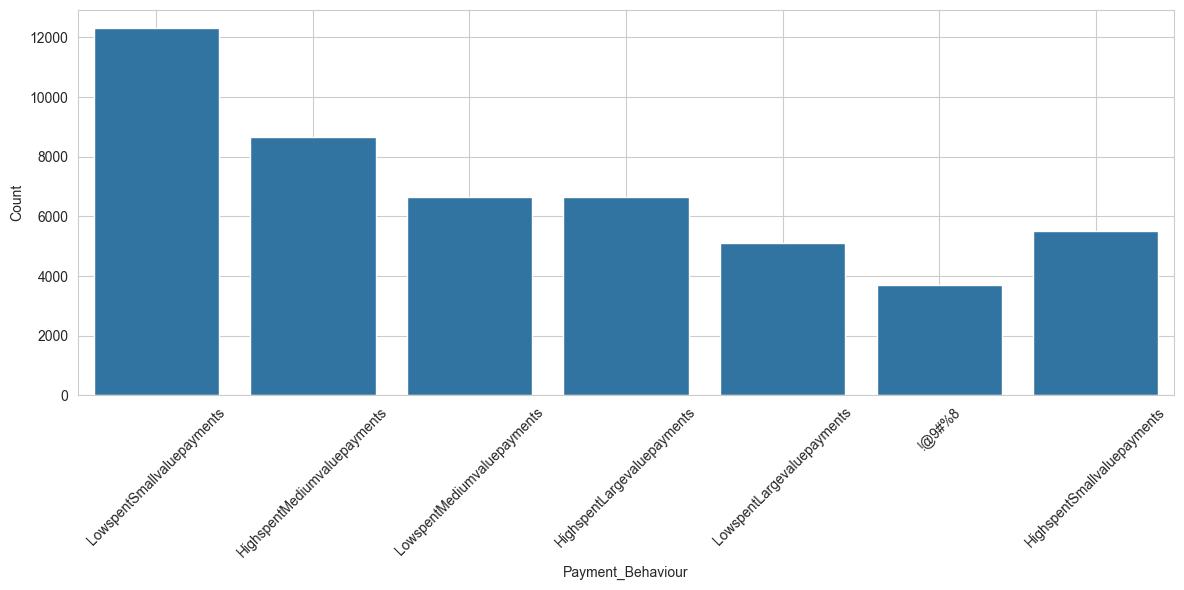

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:

df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)


In [109]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      16003
HighspentMediumvaluepayments     8654
LowspentMediumvaluepayments      6651
HighspentLargevaluepayments      6648
HighspentSmallvaluepayments      5510
LowspentLargevaluepayments       5117
Name: count, dtype: int64

In [110]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      16003
High_spent_Medium_value_payments     8654
Low_spent_Medium_value_payments      6651
High_spent_Large_value_payments      6648
High_spent_Small_value_payments      5510
Low_spent_Large_value_payments       5117
Name: count, dtype: int64

### Monthly_Balance

In [111]:
df.Monthly_Balance.isna().sum()

546

In [112]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [113]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

6

In [114]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [115]:
df['Monthly_Balance'].value_counts().head(15)

Monthly_Balance
186.267    1
223.408    1
354.629    1
297.881    1
334.488    1
340.569    1
445.765    1
472.376    1
482.552    1
448.694    1
200.740    1
252.533    1
531.248    1
305.438    1
389.538    1
Name: count, dtype: int64

In [116]:
df['Monthly_Balance'].max()

1606.5181919814756

In [117]:
df['Monthly_Balance'].min()

0.103402231183395

In [118]:
df['Monthly_Balance'].mean()

403.23744305032864

In [119]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

0

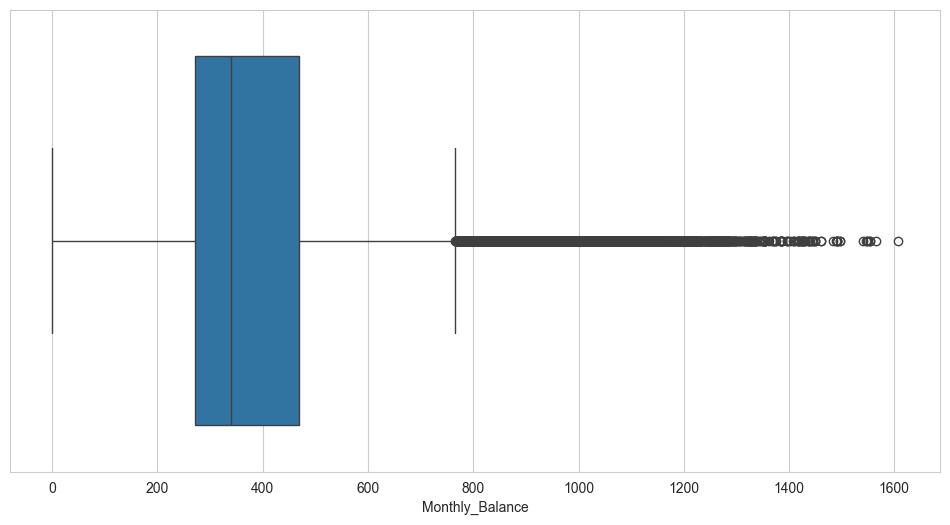

In [120]:
sns.boxplot(df, x= df['Monthly_Balance']);

In [121]:
# lastly change wrong dtypes..
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48577 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        48577 non-null  int64  
 1   Occupation                 48577 non-null  object 
 2   Annual_Income              48577 non-null  float64
 3   Num_Bank_Accounts          48577 non-null  int64  
 4   Num_Credit_Card            48577 non-null  int64  
 5   Interest_Rate              48577 non-null  int64  
 6   Num_of_Loan                48577 non-null  object 
 7   Delay_from_due_date        48577 non-null  int64  
 8   Num_of_Delayed_Payment     48577 non-null  float64
 9   Num_Credit_Inquiries       48577 non-null  float64
 10  Credit_Mix                 48577 non-null  object 
 11  Outstanding_Debt           48577 non-null  float64
 12  Credit_Utilization_Ratio   48577 non-null  float64
 13  Payment_of_Min_Amount      48577 non-null  object 


# Visualisations

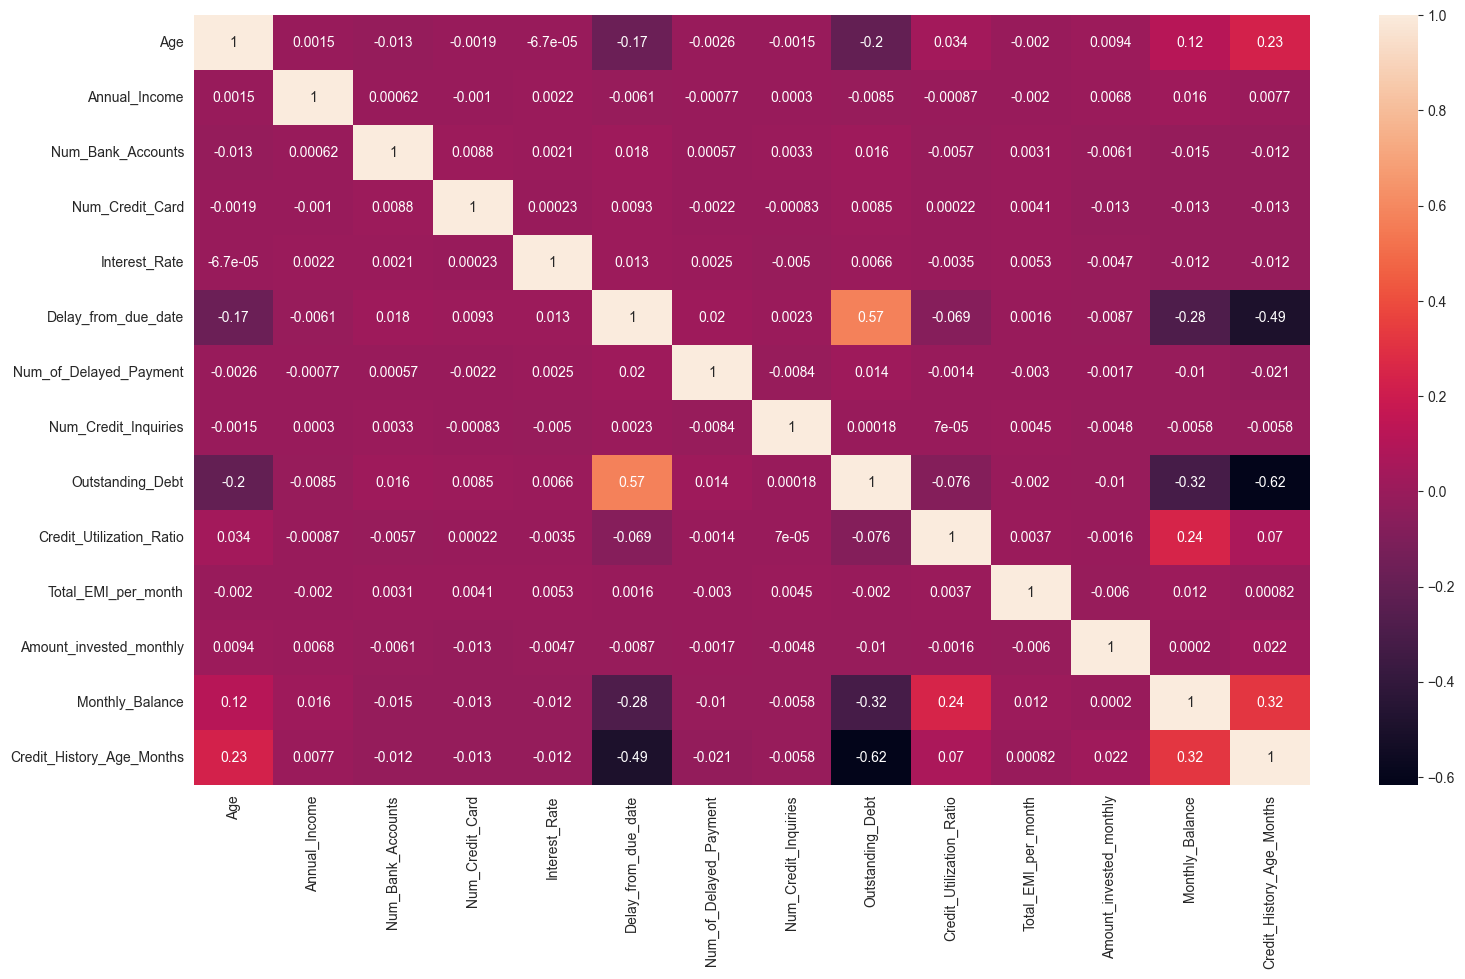

In [122]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

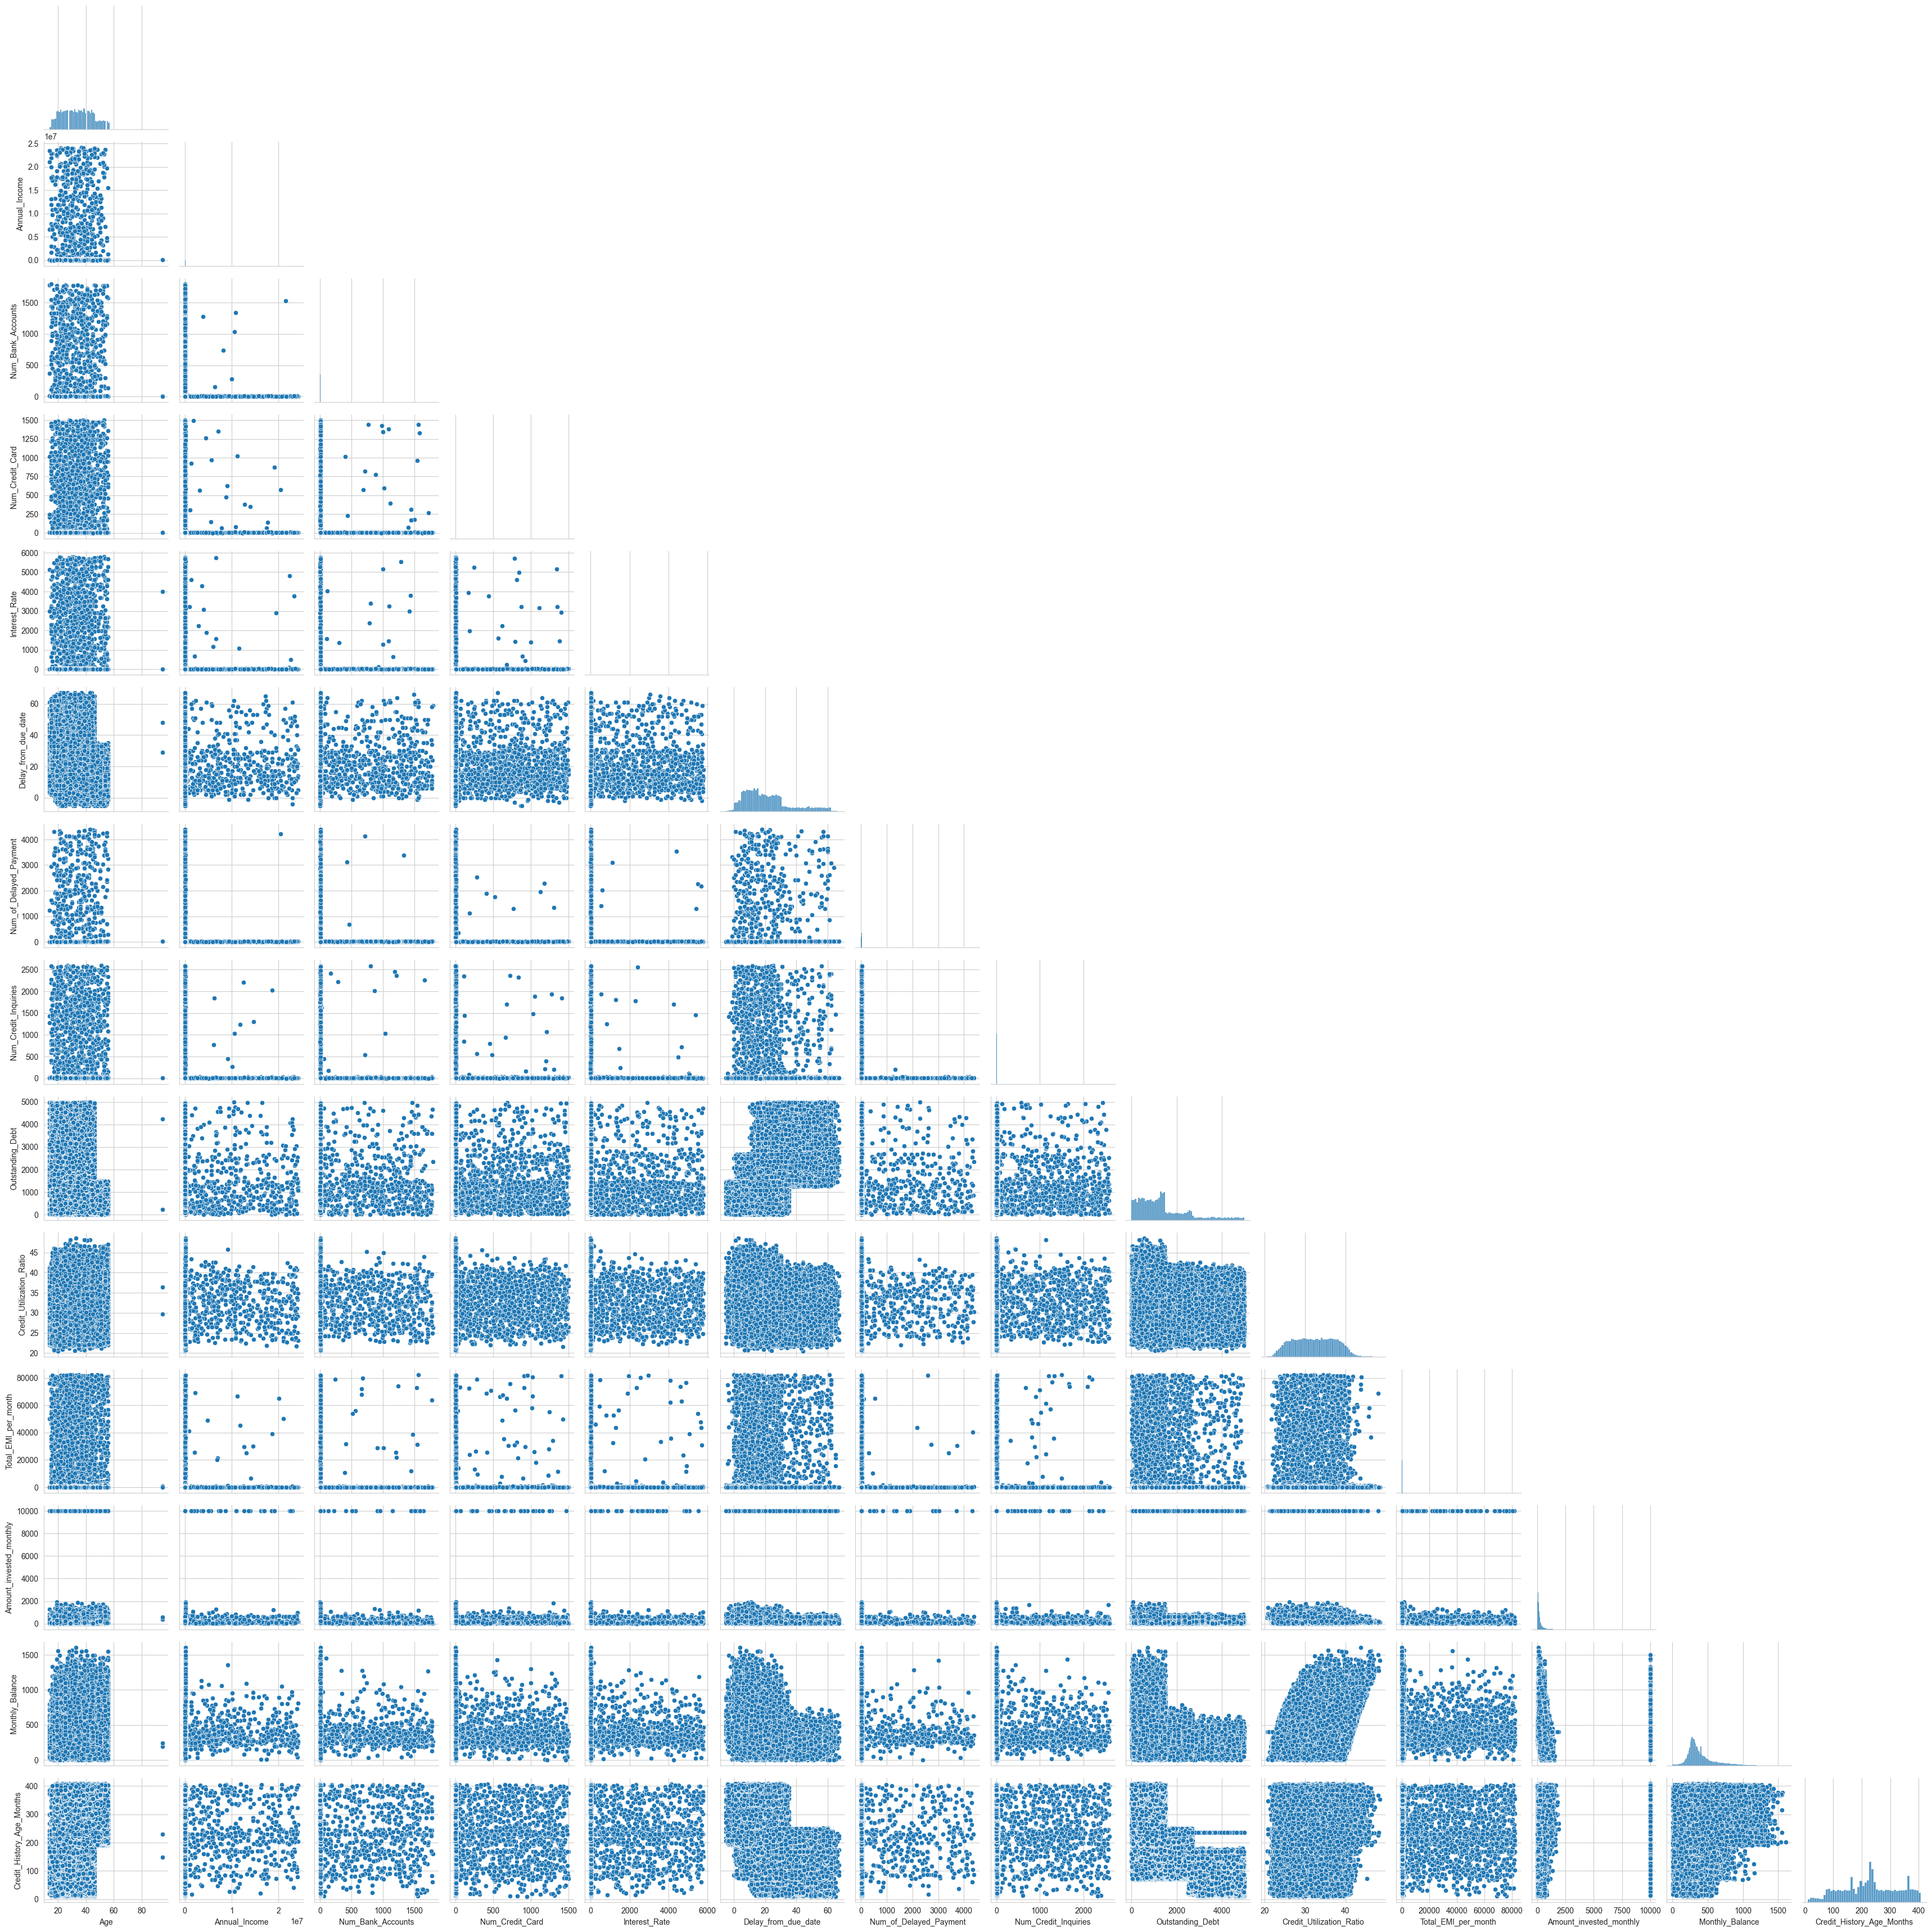

In [123]:
sns.pairplot(df, corner=True);

# Save and read clean data

In [126]:

df.to_csv('data/test_cleaned.csv', index=False, mode='w')

# In ra thông báo sau khi lưu thành công
print("Đã lưu dataframe vào file CSV thành công!")

Đã lưu dataframe vào file CSV thành công!


In [128]:

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,23,Scientist,19114.120,3,4,3,4,3,7.000,2022.000,Good,809.980,35.030,No,49.575,236.643,Low_spent_Small_value_payments,186.267,273
1,24,Scientist,19114.120,3,4,3,4,3,9.000,4.000,Good,809.980,33.053,No,49.575,21.465,High_spent_Medium_value_payments,361.444,274
2,24,Scientist,19114.120,3,4,3,4,-1,4.000,4.000,Good,809.980,33.812,No,49.575,148.234,Low_spent_Medium_value_payments,264.675,366
3,24,Scientist,19114.120,3,4,3,4,4,5.000,4.000,Good,809.980,32.431,No,49.575,39.083,High_spent_Medium_value_payments,343.827,276
4,28,Other,34847.840,2,4,6,1,3,1.000,5.000,Good,605.030,25.927,No,18.816,39.684,High_spent_Large_value_payments,485.298,327
